<a href="https://colab.research.google.com/github/tkdforever18/Carlos/blob/main/Clase_7_Clustering_pocos_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clase #7 - CLUSTERING**
Hierarchical clustering; 
K-means clustering

Cluster analisis
Is an Unsupervised Machine Learning algorithm - No tiene labels
Supervised - tiene labels


In [1]:
path = 'https://raw.githubusercontent.com/tec03/Datasets/main/datasets/reg_data.csv'

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(path)
df

,Gender,Salary,Age,Place,Weight,Company,Education,JoinYear
0,Female,1300.0,35.0,Chicago,80.0,BMW,Bachelor,2008
1,Female,1250.0,33.0,Chicago,82.5,Ford,HighSchool,2010
2,Male,2200.0,34.0,New York,100.8,BMW,Bachelor,2004
3,Male,2100.0,42.0,New York,90.0,BMW,Master,2000
4,Female,1500.0,29.0,Chicago,67.0,Ford,Master,2010
5,Female,1700.0,42.0,Washington,60.0,Ford,Master,2000
6,Male,3000.0,50.0,Washington,77.0,Ford,HighSchool,2010
7,Male,3000.0,55.0,Washington,77.0,Ford,Bachelor,2010
8,Female,2800.0,31.0,New York,87.0,Ford,Bachelor,2004
9,Male,2900.0,46.0,New York,70.0,GM,Master,2008


In [5]:
df.dropna(inplace = True) #Para limpiar y hacer una base de datos más pequeña
df

,Gender,Salary,Age,Place,Weight,Company,Education,JoinYear
0,Female,1300.0,35.0,Chicago,80.0,BMW,Bachelor,2008
1,Female,1250.0,33.0,Chicago,82.5,Ford,HighSchool,2010
2,Male,2200.0,34.0,New York,100.8,BMW,Bachelor,2004
3,Male,2100.0,42.0,New York,90.0,BMW,Master,2000
4,Female,1500.0,29.0,Chicago,67.0,Ford,Master,2010
5,Female,1700.0,42.0,Washington,60.0,Ford,Master,2000
6,Male,3000.0,50.0,Washington,77.0,Ford,HighSchool,2010
7,Male,3000.0,55.0,Washington,77.0,Ford,Bachelor,2010
8,Female,2800.0,31.0,New York,87.0,Ford,Bachelor,2004
9,Male,2900.0,46.0,New York,70.0,GM,Master,2008


# Vamos a hacer clustering con 2 variables es decir 2 columnas para éste ejercicio (X y Y)

In [6]:
ndf = df[['Age','Weight']]
ndf.shape

(12, 2)

In [7]:
ndf

,Age,Weight
0,35.0,80.0
1,33.0,82.5
2,34.0,100.8
3,42.0,90.0
4,29.0,67.0
5,42.0,60.0
6,50.0,77.0
7,55.0,77.0
8,31.0,87.0
9,46.0,70.0


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

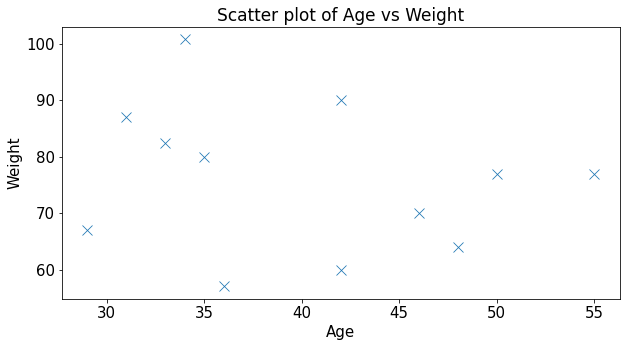

In [10]:
plt.figure(figsize=(10, 5))

pp = sns.scatterplot(x = ndf['Age'], 
                     y = ndf['Weight'],
                     #hue='D', 
                     marker='x',
                     s=100,#size of markers
                     cmap="nipy_spectral"
                    )


#pp.set_facecolor("yellow")
pp.set_xlabel('Age', size = 15)
pp.set_ylabel('Weight', size = 15)

plt.xticks(fontsize =15)
plt.yticks(fontsize =15)


pp.set_title("Scatter plot of Age vs Weight", size = 17)
plt.show()

In [11]:
from sklearn.cluster import KMeans

In [17]:
km = KMeans(n_clusters = 3,  #Centroid = 3, solo tenemos 3 cluster
            random_state = 0 #para que los puntos no se muevan, ya que si no se pone se pueden mover poquito
            )
km.fit(ndf)

KMeans(n_clusters=3, random_state=0)

In [18]:
print('Centroids are ', km.cluster_centers_)
print('Inertia is ', km.inertia_)

Centroids are  [[35.         88.06      ]
 [49.75       72.        ]
 [35.66666667 61.33333333]]
Inertia is  633.1553333333333


Centroids are  [[40.08333333 76.025     ]] = Es una lista y es un solo cluster
Eje x = 40.08333 , Eje y = 76.025

Inertia is  2631.1991666666663

In [19]:
km.labels_  # que tantos diferentes números hay? si solo hay ceros, primer renglón es cluster 0, segundo renglón cluster 0, etc...
#Indica a que cluster pertenece cada renglón.

array([0, 0, 0, 0, 2, 2, 1, 1, 0, 1, 2, 1], dtype=int32)

Vamos a graficar los centroids: que vienen de km.cluster_centers_

In [28]:
km.cluster_centers_[ : , 0]  # para llamar los centroids respectivos del eje X de todos los renglones

array([35.        , 49.75      , 35.66666667])

In [27]:
km.cluster_centers_[: , 1]

array([88.06      , 72.        , 61.33333333])

In [29]:
x_cords = km.cluster_centers_[: , 0]
y_cords = km.cluster_centers_[: , 1]

In [30]:
print(x_cords)
print(y_cords)

[35.         49.75       35.66666667]
[88.06       72.         61.33333333]


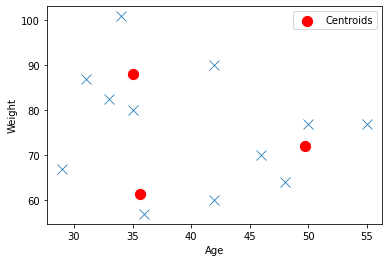

In [35]:
pp = sns.scatterplot(x = ndf['Age'], 
                     y = ndf['Weight'],
                     #hue='D', 
                     marker='x',
                     s=100,#size of markers
                     cmap="nipy_spectral"
                    )

pp = sns.scatterplot(x = x_cords, 
                     y = y_cords,
                     #hue='D', 
                     marker='o',
                     s=150,#size of markers
                     cmap="nipy_spectral",
                     color = 'red',
                     label = 'Centroids'
                    )

Para saber el cluster ideal hay que verificar la distancia (Inertia)
Inertia is  633.1553333333333


Vamos a verificar si hay 12 datos y 12 clusters, en teoría la distancia de cada punto a en 12 clusters es = 0

In [38]:
df.shape

(12, 8)

In [37]:
df.shape[0] # para llamar el 12 solamente

12

In [45]:
wcss = []
max_centroid = df.shape[0]+1

for i in range (1, max_centroid): #max_centroid = 12
  km = KMeans(n_clusters = i,
              random_state = 0,
              init = 'k-means++'   #inizializations, cada vez está reiniciando el i, es un for loop
              )
  km.fit(ndf)
  wcss.append(km.inertia_)
  print('for i = {}, \t inertia is ={}'.format(i, km.inertia_))

for i = 1, 	 inertia is =2631.1991666666663
for i = 2, 	 inertia is =1168.214857142857
for i = 3, 	 inertia is =633.1553333333333
for i = 4, 	 inertia is =423.56999999999994
for i = 5, 	 inertia is =297.31999999999994
for i = 6, 	 inertia is =178.48666666666662
for i = 7, 	 inertia is =88.16666666666666
for i = 8, 	 inertia is =60.125
for i = 9, 	 inertia is =37.625
for i = 10, 	 inertia is =17.625
for i = 11, 	 inertia is =5.125
for i = 12, 	 inertia is =0.0


In [46]:
print('my value i is ',i)

my value i is  12


In [47]:
print('for i = {} clusters, \t inertia is ={}'.format(i, km.inertia_))

for i = 12 clusters, 	 inertia is =0.0


In [48]:
import matplotlib.pyplot as plt

<AxesSubplot:>

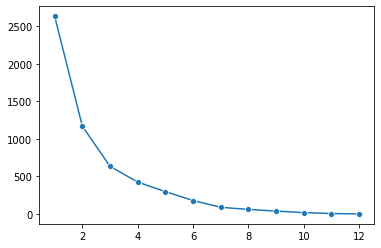

In [50]:
sns.lineplot(x = range(1, max_centroid),
             y = wcss,
             marker = 'o',
)       

el codo es el tercer cluster, por lo que el ideal sería 3 clusters



Nos traemos nuevamente la gráfica que hicimos anteriormente

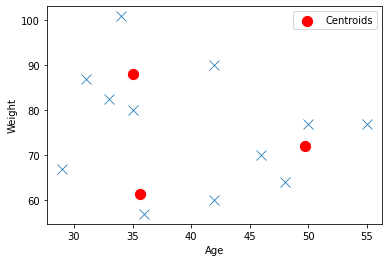

In [51]:
pp = sns.scatterplot(x = ndf['Age'], 
                     y = ndf['Weight'],
                     #hue='D', 
                     marker='x',
                     s=100,#size of markers
                     cmap="nipy_spectral"
                    )

pp = sns.scatterplot(x = x_cords, 
                     y = y_cords,
                     #hue='D', 
                     marker='o',
                     s=150,#size of markers
                     cmap="nipy_spectral",
                     color = 'red',
                     label = 'Centroids'
                    )

vamos a pintar las tachitas del color del cluster correspondiente